# A linear regression model to predict the probability of admission of a student to a university of particular rating based on the GRE score , TOEFL score , CGPA and SOP .

## Importing the required modules

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns

## Reading Data

In [88]:
df = pd.read_csv('adm.csv')
dg=df
df

,GRE_Score,TOEFL_Score,University Rating,CGPA,SOP,chance
0,337,118,4,9.65,4.5,0.92
1,324,107,4,8.87,4.0,0.76
2,316,104,3,8.00,3.0,0.72
3,322,110,3,8.67,3.5,0.80
4,314,103,2,8.21,2.0,0.65
...,...,...,...,...,...,...
495,332,108,5,9.02,4.5,0.87
496,337,117,5,9.87,5.0,0.96
497,330,120,5,9.56,4.5,0.93
498,312,103,4,8.43,4.0,0.73


## Filling up missing data if any

In [77]:
X = df[['GRE_Score', 'TOEFL_Score','University Rating','CGPA','SOP']]
y = df['chance']

## Divide the data into training and test sets

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 , test_size=0.3, random_state=0)

## Training the model to get the intercept and coefficients of linear regression model

In [79]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Showing the coefficients and intercept

In [80]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GRE_Score,0.002400
TOEFL_Score,0.002282
University Rating,0.009963
CGPA,0.130757
SOP,0.006218


In [81]:
regressor.intercept_

-1.456644356235142

## Plot simulation of data

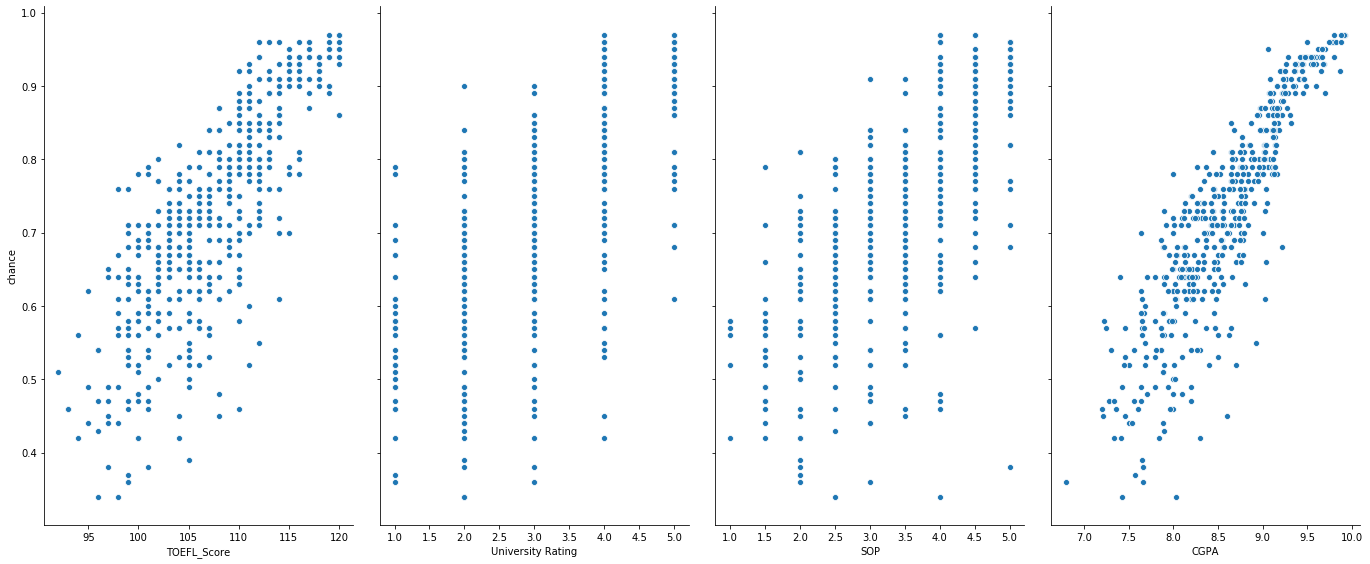

In [82]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.pairplot(df, x_vars=['TOEFL_Score','University Rating','SOP','CGPA'], 
             y_vars='chance', height=8, aspect=0.6, kind='scatter')
plt.show()

## Heat-map visualisation of data

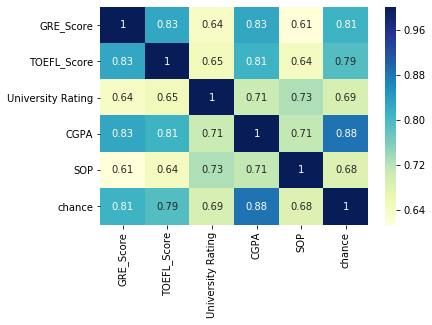

In [89]:
sns.heatmap(dg.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Making predictions on the test data

In [83]:
y_pred = regressor.predict(X_test)

## Compare actual and predicted data

In [84]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
90,0.64,0.628765
254,0.85,0.831056
283,0.80,0.776153
445,0.91,0.860260
461,0.68,0.606937
...,...,...
4,0.65,0.637803
318,0.79,0.770277
331,0.73,0.629618
245,0.81,0.825649


## Calculating absolute error

In [90]:
from sklearn import metrics
print('Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Absolute Error: 0.04500436833697687


## Finding the probability of admission of a student to a university of rating 4.2 by who has got GRE Score = 310, TOEFL Score =102, CGPA=8.43	and SOP =4.0 .

In [62]:
regressor.predict([[310,102,4.2,8.43,4.0]])

array([0.68904298])

## Finding the probability of admission of a student to a university of rating 4.0 by who has got GRE Score = 312, TOEFL Score =103, CGPA=8.43	and SOP =4.0 . ( Taken from the dataset where probability is given 0.73 )

In [63]:
regressor.predict([[312,103,4.0,8.43,4.0]])

array([0.69413197])